In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [10]:
#read the CSV file into a dataframe
df= pd.read_csv('pG_classic_no_grouping_no_remap_100.csv')

#select columns that you want to keep 
columns_to_keep=['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df) 
new_df.to_csv('ProteinIDs_classic_no_grouping_no_remap_100_withScore.csv', index=False)

                        Protein IDs   Q-value     Score
0              sp|P35579|MYH9_HUMAN  0.000292  4.000000
1             sp|O75477|ERLN1_HUMAN  0.000292  3.999996
2              sp|P05121|PAI1_HUMAN  0.000292  3.999996
3             sp|Q8WVM8|SCFD1_HUMAN  0.000292  3.999991
4             sp|P46821|MAP1B_HUMAN  0.000292  3.999987
...                             ...       ...       ...
27529       sp|Q9Y6A2-3|CP46A_HUMAN  0.839022  0.302400
27530    REV__sp|Q9BZA8|PC11Y_HUMAN  0.839089  0.302207
27531    REV__sp|Q9H1Z4|WDR13_HUMAN  0.839156  0.301888
27532  REV__sp|Q6ISS4-2|LAIR2_HUMAN  0.839166  0.301630
27533         sp|Q06330-3|SUH_HUMAN  0.839166  0.301447

[27534 rows x 3 columns]


In [11]:
df = pd.read_csv('ProteinIDs_classic_no_grouping_no_remap_100_withScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_classic_no_grouping_no_remap_100_withScore.csv')

        Q-value Protein Type Protein Uniprot Protein Label
0      0.000292           sp          P35579    MYH9_HUMAN
1      0.000292           sp          O75477   ERLN1_HUMAN
2      0.000292           sp          P05121    PAI1_HUMAN
3      0.000292           sp          Q8WVM8   SCFD1_HUMAN
4      0.000292           sp          P46821   MAP1B_HUMAN
...         ...          ...             ...           ...
27529  0.839022           sp        Q9Y6A2-3   CP46A_HUMAN
27530  0.839089      REV__sp          Q9BZA8   PC11Y_HUMAN
27531  0.839156      REV__sp          Q9H1Z4   WDR13_HUMAN
27532  0.839166      REV__sp        Q6ISS4-2   LAIR2_HUMAN
27533  0.839166           sp        Q06330-3     SUH_HUMAN

[27534 rows x 4 columns]


sp         13333
REV__sp    10937
REV__sR      857
sR           835
REV__pI      644
pI           624
sU           110
REV__sU       86
nC            69
REV__nC       39
Name: Protein Type, dtype: int64


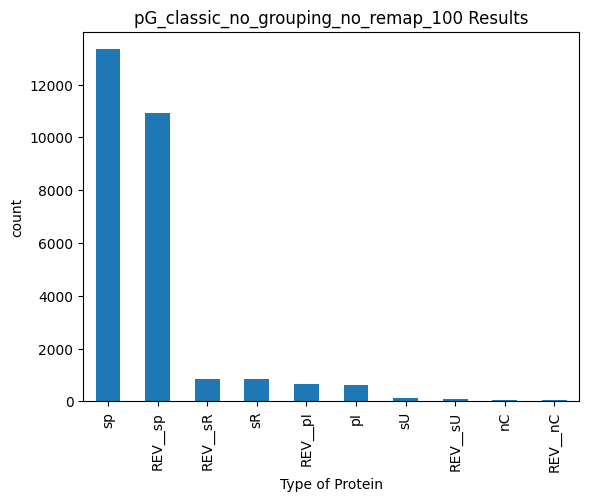

In [12]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap_100_withScore.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_classic_no_grouping_no_remap_100 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

Protein Type
REV__pI       1
REV__sp      56
pI            2
sR            1
sU            1
sp         5849
Name: Protein Type, dtype: int64


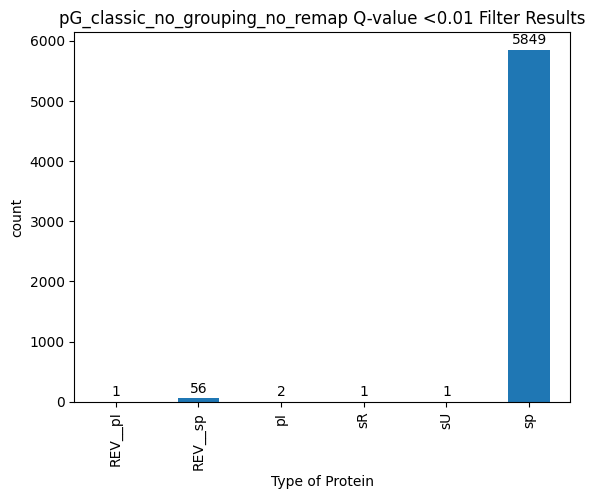

In [13]:
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap_100_withScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_classic_no_grouping_no_remap_100 Q-value <0.01 Filter Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          

In [14]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI       1
REV__sp      56
pI            2
sR            1
sU            1
sp         5849
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC       39
REV__pI      643
REV__sR      857
REV__sU       86
REV__sp    10881
nC            69
pI           622
sR           834
sU           109
sp          7484
Name: Protein Type, dtype: int64


# Q-value filter CUTOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_37251/2303463222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_37251/2303463222.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

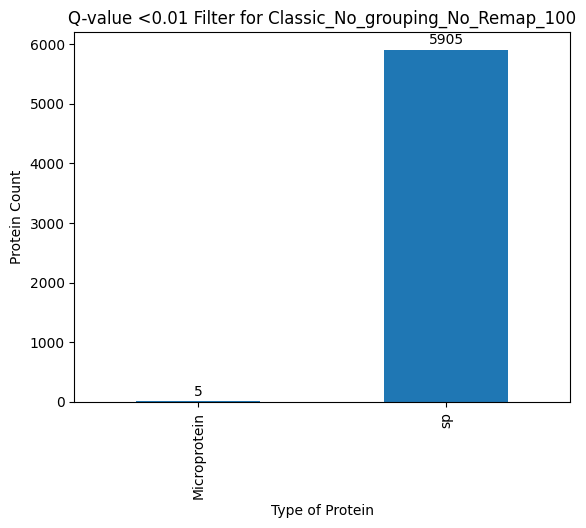

In [16]:

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Classic_No_grouping_No_Remap_100')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value filter

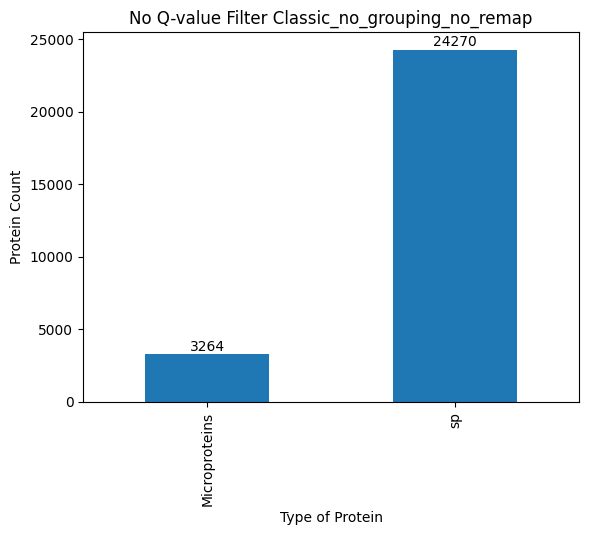

In [17]:
# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Classic_no_grouping_no_remap_100')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap_100_withScore.csv')
csv2 = pd.read_csv('UniprotHumanProteome-ProteomeHDv2.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemap_100.csv', index=False)

       Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0               0  0.000292           sp          P35579    MYH9_HUMAN   
1           16307  0.553777      REV__sp          P35579    MYH9_HUMAN   
2               1  0.000292           sp          O75477   ERLN1_HUMAN   
3           17981  0.612770      REV__sp          O75477   ERLN1_HUMAN   
4               2  0.000292           sp          P05121    PAI1_HUMAN   
...           ...       ...          ...             ...           ...   
19383       27524  0.839022      REV__sp          P78412    IRX6_HUMAN   
19384       27506  0.838591           sp          P01569   IFNA5_HUMAN   
19385       27512  0.838869      REV__sp          Q05315   LEG10_HUMAN   
19386       27526  0.839022           sp          Q96SJ8   TSN18_HUMAN   
19387       27530  0.839089      REV__sp          Q9BZA8   PC11Y_HUMAN   

                                           Protein names  Length    Mass  
0      Myosin-9 (Cellular myosin hea

In [3]:
# check for duplicate mappings
duplicates = merged_csv.duplicated(subset=['Protein Uniprot', 'Protein Uniprot'], keep=False)

# print out the duplicate mappings
print('Duplicate mappings:')
print(merged_csv[duplicates])

Duplicate mappings:
       Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0               0  0.000292           sp          P35579    MYH9_HUMAN   
1           16307  0.553777      REV__sp          P35579    MYH9_HUMAN   
2               1  0.000292           sp          O75477   ERLN1_HUMAN   
3           17981  0.612770      REV__sp          O75477   ERLN1_HUMAN   
6               4  0.000292           sp          P46821   MAP1B_HUMAN   
...           ...       ...          ...             ...           ...   
19252       27462  0.837827           sp          O95057   DIRA1_HUMAN   
19335       27257  0.834095           sp          Q6ZV50    RFX8_HUMAN   
19336       27278  0.834095      REV__sp          Q6ZV50    RFX8_HUMAN   
19382       27505  0.838591           sp          P78412    IRX6_HUMAN   
19383       27524  0.839022      REV__sp          P78412    IRX6_HUMAN   

                                           Protein names  Length    Mass  
0      Myosin-9 

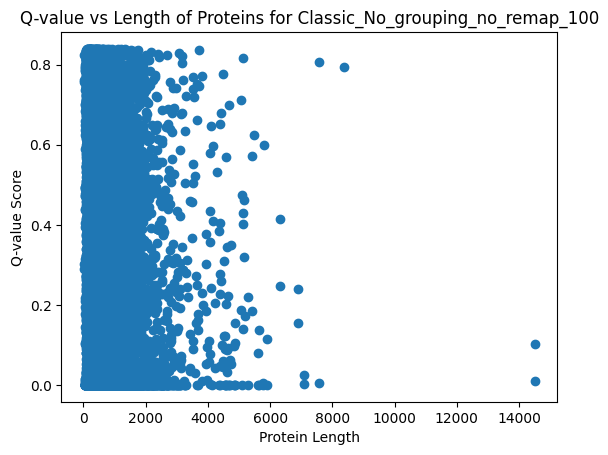

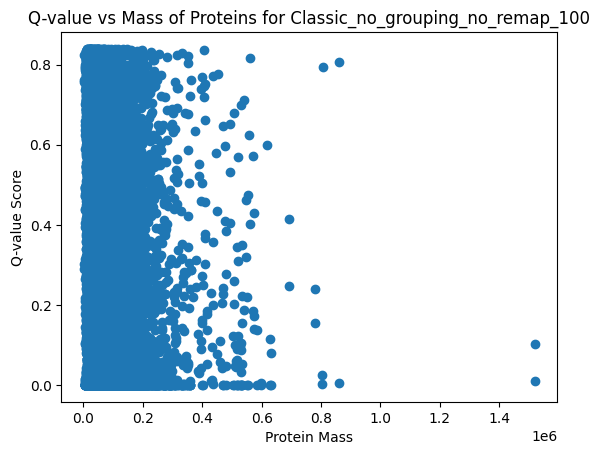

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemap_100.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Length"], data["Q-value"])
plt.title('Q-value vs Length of Proteins for Classic_No_grouping_no_remap_100')
plt.xlabel("Protein Length")
plt.ylabel("Q-value Score")
plt.show()

# Create a scatter plot of q-value vs mass
plt.scatter(data["Mass"], data["Q-value"])
plt.title('Q-value vs Mass of Proteins for Classic_no_grouping_no_remap_100')
plt.xlabel("Protein Mass")
plt.ylabel("Q-value Score")
plt.show()

Intercept: 0.3638995194765806
Slope: -3.3097378134985426e-07


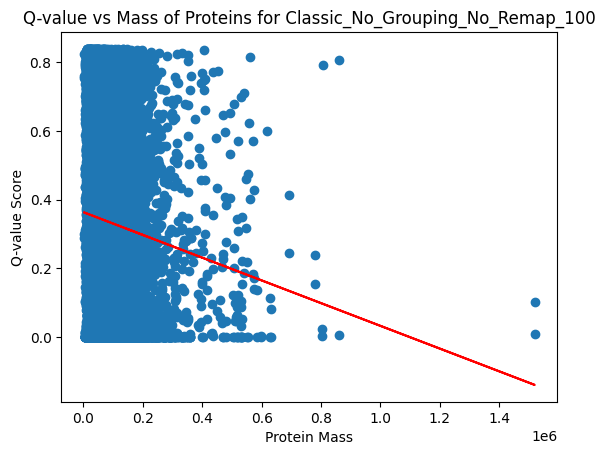

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Extract mass and q-value columns
Mass = data["Mass"]
Q_value = data["Q-value"]

# Convert mass and q-value data to numpy arrays and reshape them
Mass = np.array(Mass).reshape((-1, 1))
Q_value = np.array(Q_value)

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(Mass, Q_value)

# Print the intercept and slope of the linear regression line
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot the data and the linear regression line
plt.scatter(Mass, Q_value)
plt.plot(Mass, model.predict(Mass), color='red')
plt.title('Q-value vs Mass of Proteins for Classic_No_Grouping_No_Remap_100')
plt.xlabel("Protein Mass")
plt.ylabel("Q-value Score")
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap_100_withScore.csv')
csv2 = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap_100_withScore.csv')

#select columns that you want to keep 
columns_to_keep=['Protein Type', 'Q-value']
new_df= csv1[columns_to_keep]
new_df2=csv2[columns_to_keep]
print(new_df)
print(new_df2)

      Protein Type   Q-value
0               sp  0.000292
1               sp  0.000292
2               sp  0.000292
3               sp  0.000292
4               sp  0.000292
...            ...       ...
27529           sp  0.839022
27530      REV__sp  0.839089
27531      REV__sp  0.839156
27532      REV__sp  0.839166
27533           sp  0.839166

[27534 rows x 2 columns]
      Protein Type   Q-value
0               sp  0.000165
1               sp  0.000165
2               sp  0.000165
3               sp  0.000165
4               sp  0.000165
...            ...       ...
23326      REV__sp  0.409294
23327           sp  0.409294
23328      REV__sp  0.409328
23329      REV__sp  0.409386
23330      REV__sp  0.409444

[23331 rows x 2 columns]
